# Clustering(basic) 
In this example , we will know how to use KMeans and agglomerative hierarchical clustering to cluster the dataset.




In [1]:
import pandas as pd                     #to read file
import numpy as np                      #to cal
import matplotlib.pyplot as plt         #plot 
from mpl_toolkits.mplot3d import Axes3D #for 3D plot
from sklearn.cluster import KMeans      #use kmeans
from sklearn.metrics import silhouette_samples, silhouette_score #to cal the silhouette_score

#The data is from  
#http://archive.ics.uci.edu/ml/datasets/BLE+RSSI+Dataset+for+Indoor+localization+and+Navigation

In [2]:
try1 = pd.read_csv('iBeacon_RSSI_Labeled.csv') #read file
del try1['location']                           #set the columns
del try1['date']                               #set the columns

# Dataset
![Alt text](iBeacon_Layout.jpg)

In [3]:
try1   #check data

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
5,-200,-200,-82,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
6,-200,-200,-80,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
7,-200,-200,-86,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
8,-200,-200,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200
9,-200,-200,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [4]:
print(try1.info()) #show the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 13 columns):
b3001    1420 non-null int64
b3002    1420 non-null int64
b3003    1420 non-null int64
b3004    1420 non-null int64
b3005    1420 non-null int64
b3006    1420 non-null int64
b3007    1420 non-null int64
b3008    1420 non-null int64
b3009    1420 non-null int64
b3010    1420 non-null int64
b3011    1420 non-null int64
b3012    1420 non-null int64
b3013    1420 non-null int64
dtypes: int64(13)
memory usage: 144.3 KB
None


# K-Means


In [5]:
matrix = try1.as_matrix() #change the file type

In [6]:
n_clusters = 13                                              # number of clusters
clusterer = KMeans(n_clusters=n_clusters, random_state=10)   # use kmeans 
cluster_labels = clusterer.fit_predict(matrix)               # get the labels


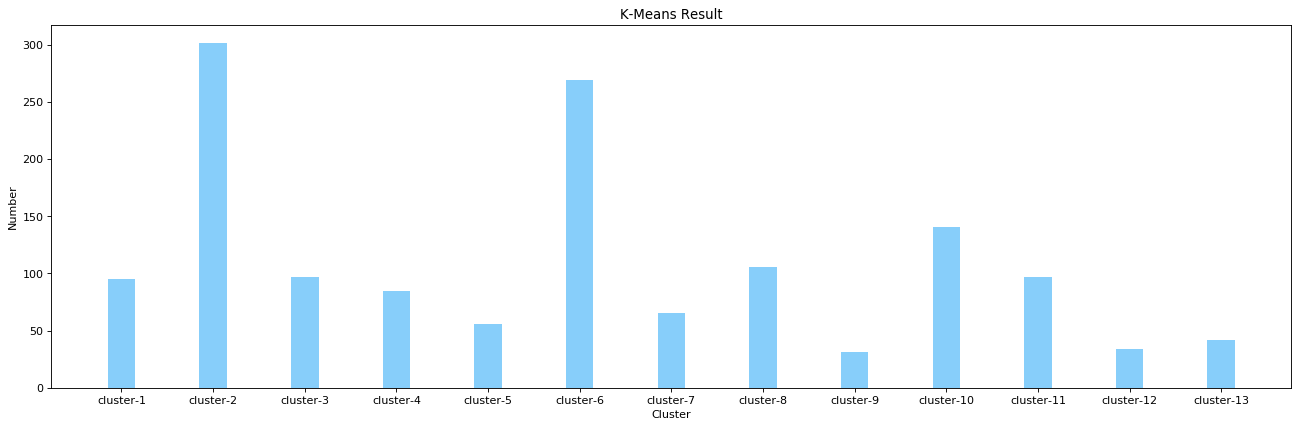

In [7]:
plt.figure(figsize=(20, 6), dpi=80)  # set fig
plt.subplot(1, 1, 1)                 # set the plot size
N = 13                               # bar numbers 
values = (np.sum(cluster_labels == 0), np.sum(cluster_labels == 1),np.sum(cluster_labels == 2),
         np.sum(cluster_labels == 3),np.sum(cluster_labels == 4),np.sum(cluster_labels == 5),
         np.sum(cluster_labels == 6),np.sum(cluster_labels == 7),np.sum(cluster_labels == 8),
         np.sum(cluster_labels == 9),np.sum(cluster_labels == 10),np.sum(cluster_labels == 11),np.sum(cluster_labels == 12)
         ) # set values for dirrerent bars

index = np.arange(N)                                                # num of each bar
width = 0.3                                                         # width of the bar
p2 = plt.bar(index, values, width, label="--", color="#87CEFA")     # plot set the color

plt.xlabel('Cluster')                               # set xlabel
plt.ylabel('Number')                                # set ylabel
plt.title('K-Means Result')                         # set title
plt.xticks(index, ('cluster-1', 'cluster-2','cluster-3','cluster-4','cluster-5','cluster-6','cluster-7',
                  'cluster-8','cluster-9','cluster-10','cluster-11','cluster-12','cluster-13',))       # set the name of each bar
plt.yticks(np.arange(0, 350, 50))                   # from 0~35000(50000 for each separate)
#plt.legend(loc="upper right")
plt.show()                                          #show

# AgglomerativeClustering

In [8]:
from sklearn.cluster import AgglomerativeClustering #use AgglomerativeClustering

ward=AgglomerativeClustering(n_clusters=13,linkage="ward", affinity="euclidean").fit(matrix) 
#use AgglomerativeClustering to cluster the data in 13 clusters
label = ward.labels_ #cal the label

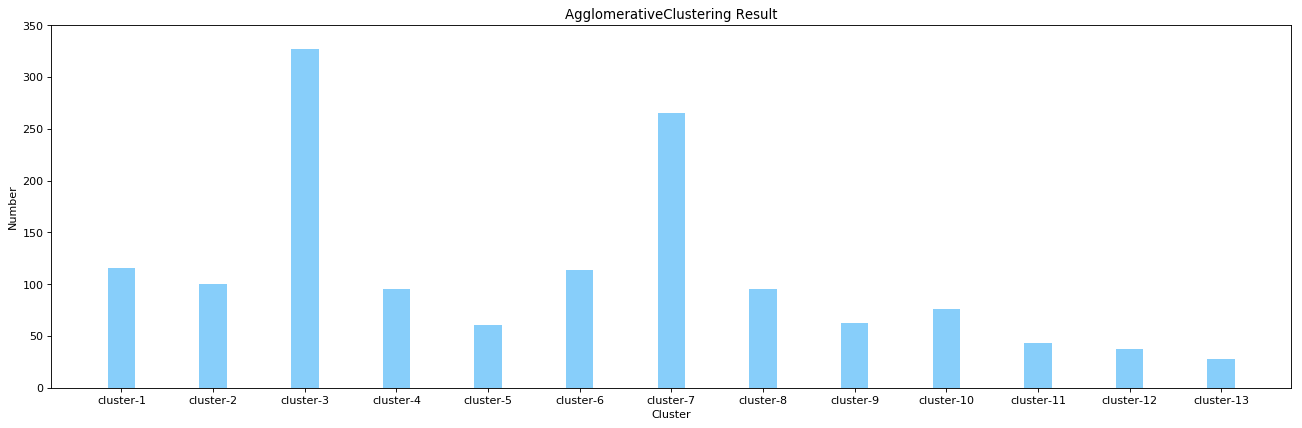

In [10]:
plt.figure(figsize=(20, 6), dpi=80)  # set fig
plt.subplot(1, 1, 1)                 # set the plot size
N = 13                               # bar numbers 

values = (np.sum(label == 0), np.sum(label == 1),np.sum(label == 2),
         np.sum(label == 3),np.sum(label == 4),np.sum(label == 5),
         np.sum(label == 6),np.sum(label == 7),np.sum(label == 8),
         np.sum(label == 9),np.sum(label == 10),np.sum(label == 11),np.sum(label == 12)
         ) # set values for dirrerent bars

index = np.arange(N)                                                # num of each bar
width = 0.3                                                         # width of the bar
p2 = plt.bar(index, values, width, label="--", color="#87CEFA")     # plot set the color

plt.xlabel('Cluster')                                               # set xlabel
plt.ylabel('Number')                                                # set ylabel
plt.title('AgglomerativeClustering Result')                         # set title
plt.xticks(index, ('cluster-1', 'cluster-2','cluster-3','cluster-4','cluster-5','cluster-6','cluster-7',
                  'cluster-8','cluster-9','cluster-10','cluster-11','cluster-12','cluster-13',))       # set the name of each bar
plt.yticks(np.arange(0, 400, 50))                   # from 0~35000(50000 for each separate)
plt.show()     #show